📊 AI Job Market - Exploratory Data Analysis
📁 Loading cleaned data...
✅ Master data loaded: (18052, 8)

📋 DATASET OVERVIEW:
Total records: 18,052
Columns: ['job_title', 'company', 'location', 'salary', 'skills', 'data_source', 'is_ai_role', 'salary_clean']

Data types:
job_title        object
company          object
location         object
salary           object
skills           object
data_source      object
is_ai_role         bool
salary_clean    float64
dtype: object

🔍 COMPREHENSIVE ANALYSIS

📊 DATA SOURCE ANALYSIS:
  ai_job_dataset: 15,000 records (83.1%)
  ai_job_market: 2,000 records (11.1%)
  linkedin_jobs: 1,052 records (5.8%)

🤖 AI ROLE ANALYSIS:
  AI Roles: 15,108 (83.7%)
  Non-AI Roles: 2,944 (16.3%)

💰 SALARY ANALYSIS:
  Records with salary: 15,000 (83.1%)
  Average salary: $115,349
  Median salary: $99,705
  Salary range: $32,519 - $399,095
  Standard deviation: $60,261

📈 CREATING ADVANCED VISUALIZATIONS


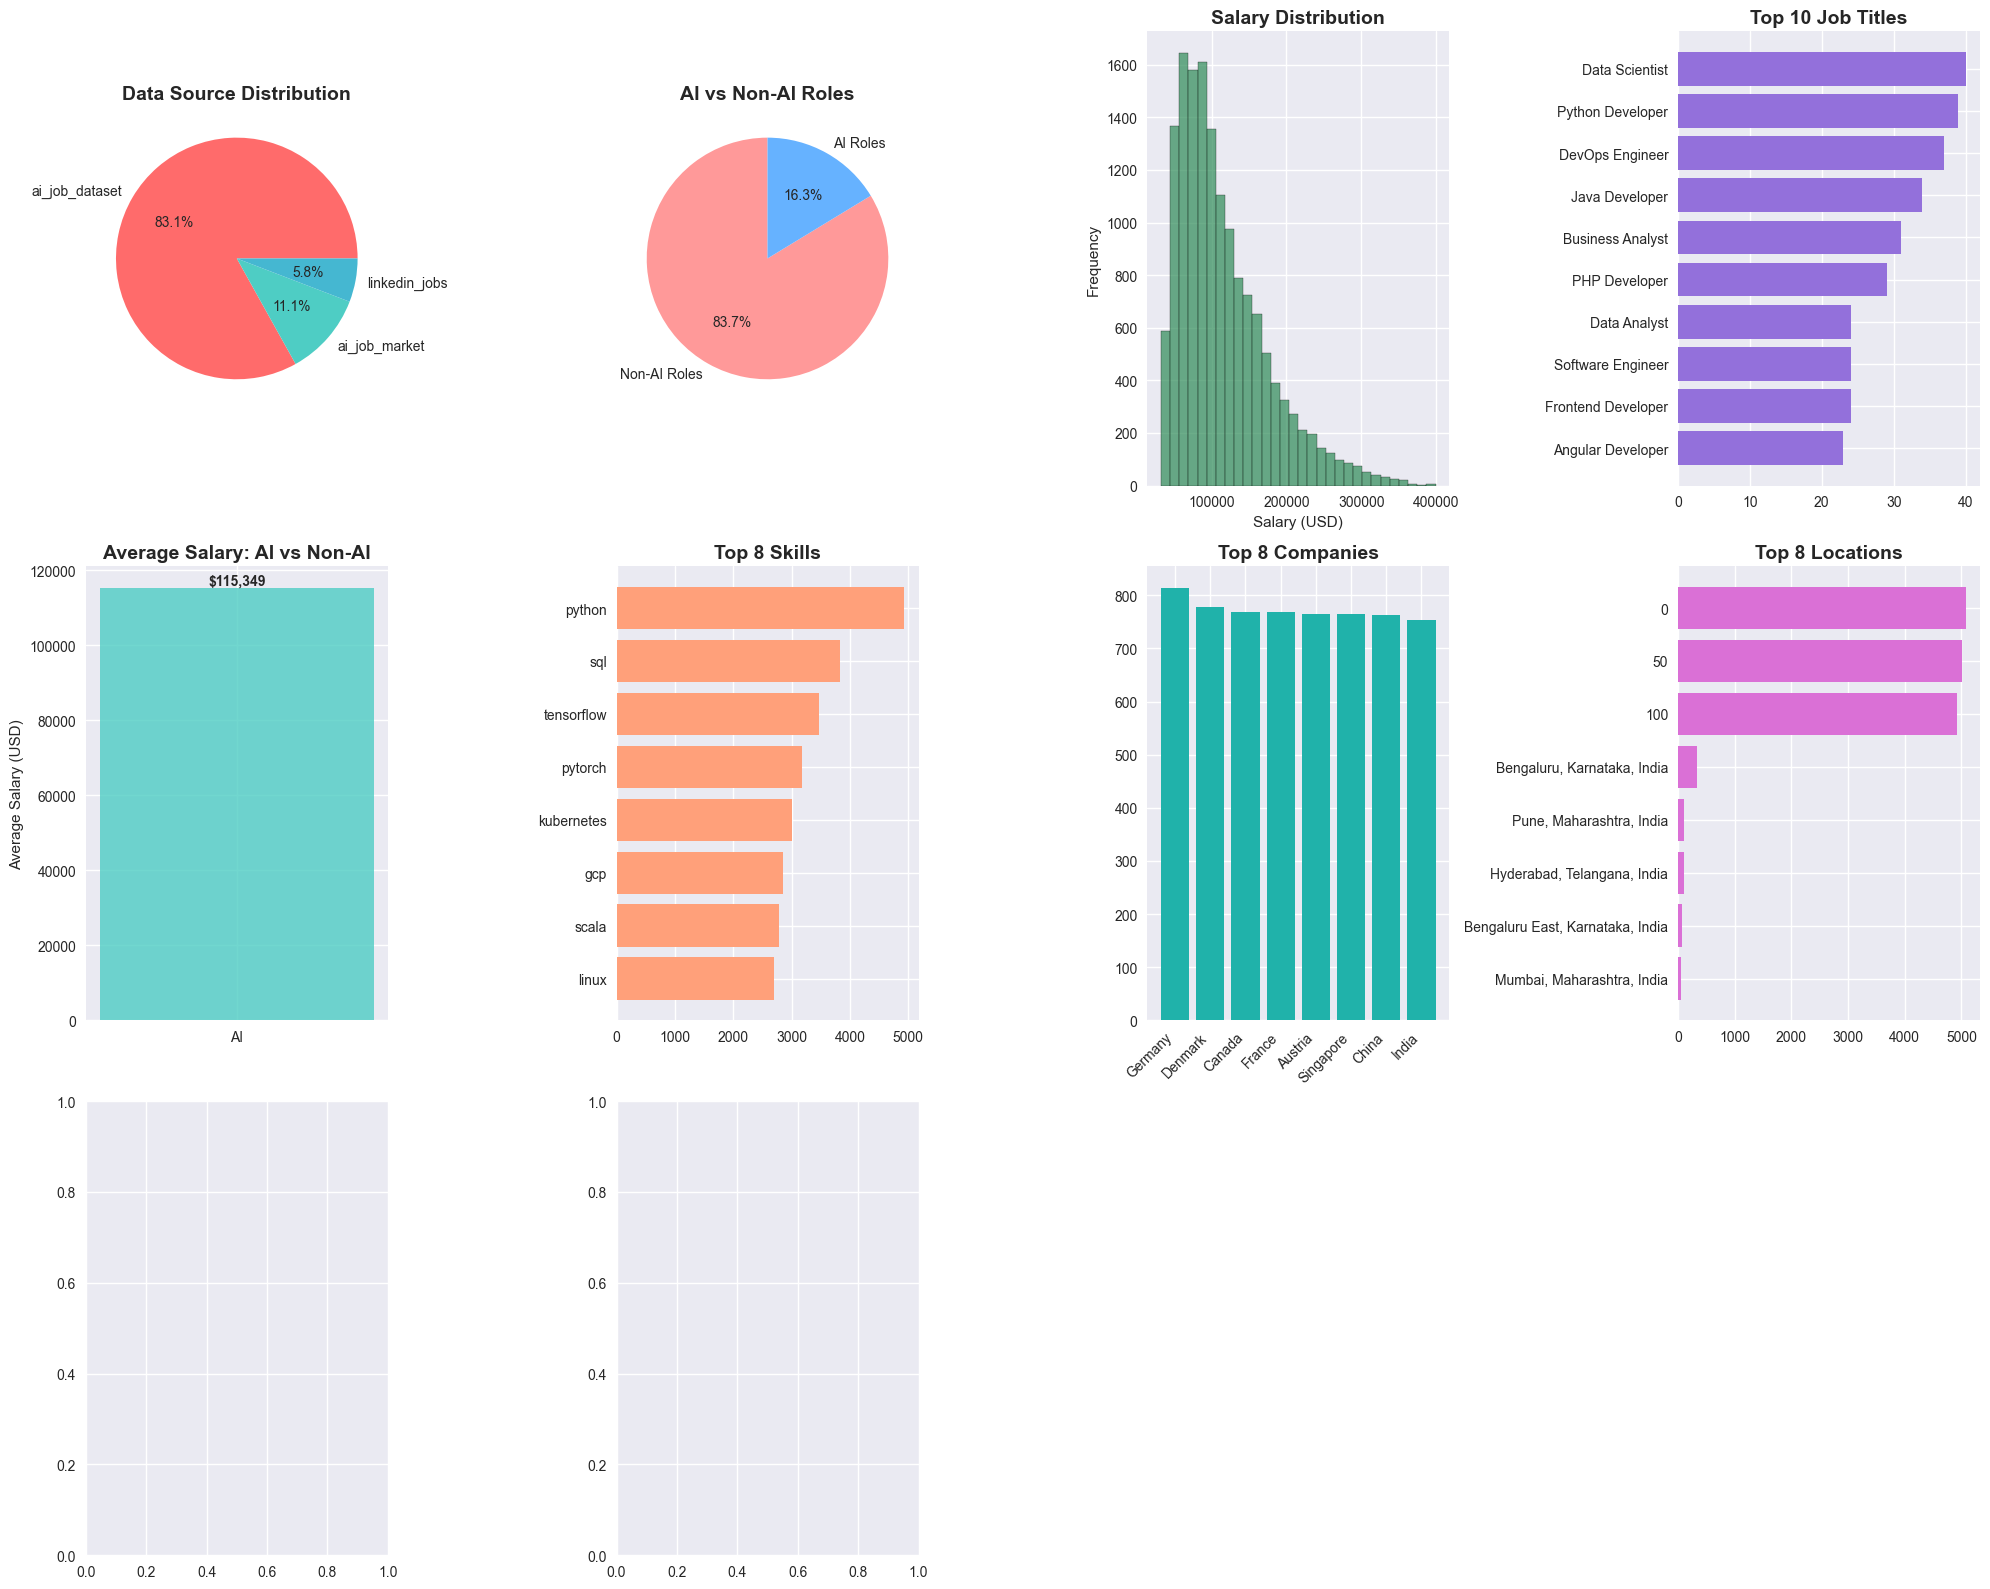

✅ Comprehensive EDA visualization saved!

🎨 CREATING INTERACTIVE VISUALIZATIONS...


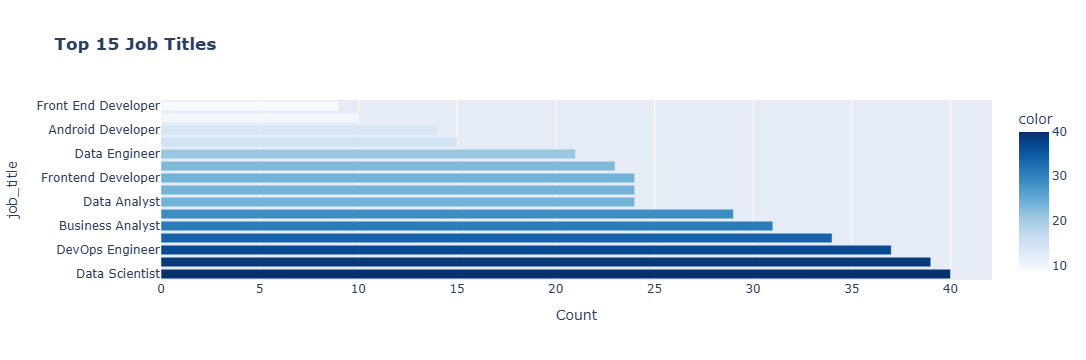

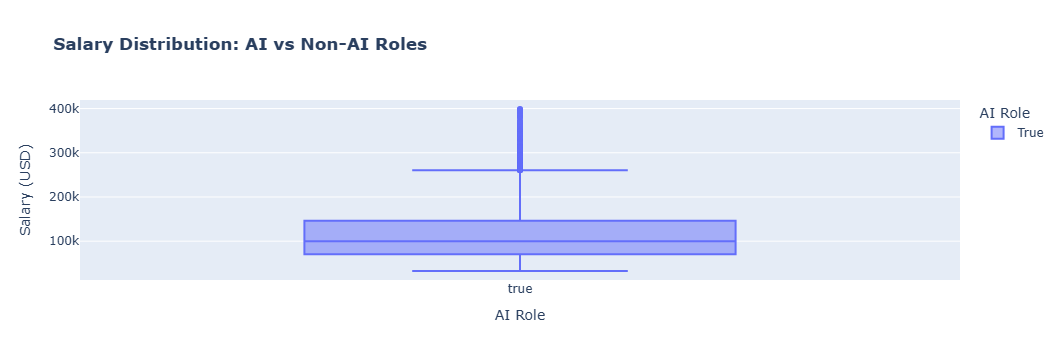

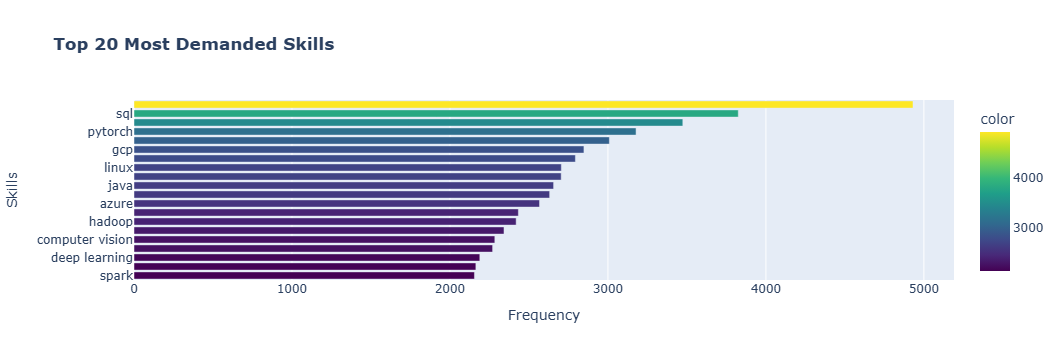


💡 KEY INSIGHTS AND BUSINESS INTELLIGENCE

📈 MARKET OVERVIEW:
• Total job market analysis: 18,052 records
• AI penetration in job market: 83.7%

💰 SALARY INSIGHTS:
• AI roles command +nan% salary premium
• Average AI role salary: $115,349
• Average non-AI role salary: $nan

🛠️  SKILLS IN DEMAND:
Top 5 most demanded skills:
  • Python: 4931 occurrences
  • Sql: 3825 occurrences
  • Tensorflow: 3474 occurrences
  • Pytorch: 3178 occurrences
  • Kubernetes: 3009 occurrences

🌍 GEOGRAPHICAL DISTRIBUTION:
  • 0: 5,075 jobs
  • 50: 5,005 jobs
  • 100: 4,920 jobs

🏢 COMPANY LANDSCAPE:
  • Companies analyzed: 2,446

✅ EXPLORATORY DATA ANALYSIS COMPLETED!
🎯 READY FOR DASHBOARD DEVELOPMENT!


In [2]:
# COMPREHENSIVE EDA FOR AI JOB MARKET ANALYSIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import os  # <-- ADDED THIS IMPORT
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("📊 AI Job Market - Exploratory Data Analysis")
print("=" * 60)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. LOAD THE CLEANED MASTER DATA
print("📁 Loading cleaned data...")

project_root = r'C:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\AI Job Market Analysis'
master_path = os.path.join(project_root, 'data', 'processed', 'master_ai_jobs.csv')

df = pd.read_csv(master_path)
print(f"✅ Master data loaded: {df.shape}")

# Display basic info
print(f"\n📋 DATASET OVERVIEW:")
print(f"Total records: {len(df):,}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

# 2. COMPREHENSIVE DATA ANALYSIS
print("\n" + "=" * 50)
print("🔍 COMPREHENSIVE ANALYSIS")
print("=" * 50)

# 2.1 Data Source Analysis
print("\n📊 DATA SOURCE ANALYSIS:")
source_stats = df['data_source'].value_counts()
for source, count in source_stats.items():
    percentage = (count / len(df)) * 100
    print(f"  {source}: {count:,} records ({percentage:.1f}%)")

# 2.2 AI Role Analysis
if 'is_ai_role' in df.columns:
    ai_stats = df['is_ai_role'].value_counts()
    print(f"\n🤖 AI ROLE ANALYSIS:")
    print(f"  AI Roles: {ai_stats.get(True, 0):,} ({ai_stats.get(True, 0)/len(df)*100:.1f}%)")
    print(f"  Non-AI Roles: {ai_stats.get(False, 0):,} ({ai_stats.get(False, 0)/len(df)*100:.1f}%)")

# 2.3 Salary Analysis
if 'salary_clean' in df.columns:
    salary_data = df['salary_clean'].dropna()
    if len(salary_data) > 0:
        print(f"\n💰 SALARY ANALYSIS:")
        print(f"  Records with salary: {len(salary_data):,} ({len(salary_data)/len(df)*100:.1f}%)")
        print(f"  Average salary: ${salary_data.mean():,.0f}")
        print(f"  Median salary: ${salary_data.median():,.0f}")
        print(f"  Salary range: ${salary_data.min():,.0f} - ${salary_data.max():,.0f}")
        print(f"  Standard deviation: ${salary_data.std():,.0f}")

# 3. ADVANCED VISUALIZATIONS
print("\n" + "=" * 50)
print("📈 CREATING ADVANCED VISUALIZATIONS")
print("=" * 50)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 16))

# 3.1 Data Source Distribution
plt.subplot(3, 4, 1)
source_counts = df['data_source'].value_counts()
plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Data Source Distribution', fontsize=14, fontweight='bold')

# 3.2 AI vs Non-AI Roles
plt.subplot(3, 4, 2)
if 'is_ai_role' in df.columns:
    ai_counts = df['is_ai_role'].value_counts()
    plt.pie(ai_counts.values, labels=['Non-AI Roles', 'AI Roles'], autopct='%1.1f%%',
            colors=['#FF9999', '#66B2FF'], startangle=90)
    plt.title('AI vs Non-AI Roles', fontsize=14, fontweight='bold')

# 3.3 Salary Distribution
plt.subplot(3, 4, 3)
if 'salary_clean' in df.columns and df['salary_clean'].notna().sum() > 0:
    salary_data = df['salary_clean'].dropna()
    plt.hist(salary_data, bins=30, alpha=0.7, color='#2E8B57', edgecolor='black')
    plt.title('Salary Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Salary (USD)')
    plt.ylabel('Frequency')

# 3.4 Top Job Titles
plt.subplot(3, 4, 4)
if 'job_title' in df.columns:
    top_jobs = df['job_title'].value_counts().head(10)
    plt.barh(range(len(top_jobs)), top_jobs.values, color='#9370DB')
    plt.yticks(range(len(top_jobs)), top_jobs.index)
    plt.title('Top 10 Job Titles', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

# 3.5 Salary by AI Role
plt.subplot(3, 4, 5)
if 'salary_clean' in df.columns and 'is_ai_role' in df.columns:
    salary_by_ai = df.groupby('is_ai_role')['salary_clean'].mean()
    colors = ['#FF6B6B', '#4ECDC4']
    plt.bar(['Non-AI', 'AI'], salary_by_ai.values, color=colors, alpha=0.8)
    plt.title('Average Salary: AI vs Non-AI', fontsize=14, fontweight='bold')
    plt.ylabel('Average Salary (USD)')
    
    # Add value labels on bars
    for i, v in enumerate(salary_by_ai.values):
        plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 3.6 Skills Analysis
plt.subplot(3, 4, 6)
if 'skills' in df.columns:
    # Extract and count skills
    all_skills = []
    for skills in df['skills'].dropna():
        if isinstance(skills, str):
            skills_list = re.split(r'[,|;]', skills)
            all_skills.extend([skill.strip().lower() for skill in skills_list if skill.strip()])
    
    if all_skills:
        skill_counts = Counter(all_skills)
        top_skills = skill_counts.most_common(8)
        skills, counts = zip(*top_skills)
        
        plt.barh(range(len(skills)), counts, color='#FFA07A')
        plt.yticks(range(len(skills)), skills)
        plt.title('Top 8 Skills', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()

# 3.7 Company Analysis
plt.subplot(3, 4, 7)
if 'company' in df.columns:
    top_companies = df['company'].value_counts().head(8)
    plt.bar(range(len(top_companies)), top_companies.values, color='#20B2AA')
    plt.xticks(range(len(top_companies)), top_companies.index, rotation=45, ha='right')
    plt.title('Top 8 Companies', fontsize=14, fontweight='bold')

# 3.8 Location Analysis
plt.subplot(3, 4, 8)
if 'location' in df.columns:
    top_locations = df['location'].value_counts().head(8)
    plt.barh(range(len(top_locations)), top_locations.values, color='#DA70D6')
    plt.yticks(range(len(top_locations)), top_locations.index)
    plt.title('Top 8 Locations', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

# 3.9 Experience Level (if available)
plt.subplot(3, 4, 9)
exp_columns = [col for col in df.columns if 'experience' in col.lower()]
if exp_columns:
    exp_col = exp_columns[0]
    exp_counts = df[exp_col].value_counts().head(6)
    plt.pie(exp_counts.values, labels=exp_counts.index, autopct='%1.1f%%')
    plt.title('Experience Level Distribution', fontsize=14, fontweight='bold')

# 3.10 Employment Type (if available)
plt.subplot(3, 4, 10)
emp_columns = [col for col in df.columns if 'employment' in col.lower() or 'job_type' in col.lower()]
if emp_columns:
    emp_col = emp_columns[0]
    emp_counts = df[emp_col].value_counts().head(5)
    plt.bar(emp_counts.index, emp_counts.values, color='#FFD700')
    plt.xticks(rotation=45, ha='right')
    plt.title('Employment Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(project_root, 'images', 'comprehensive_eda.png'), 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Comprehensive EDA visualization saved!")

# 4. INTERACTIVE PLOTLY VISUALIZATIONS
print("\n🎨 CREATING INTERACTIVE VISUALIZATIONS...")

# 4.1 Interactive Job Titles
if 'job_title' in df.columns:
    job_counts = df['job_title'].value_counts().head(15)
    fig1 = px.bar(job_counts, x=job_counts.values, y=job_counts.index,
                 title='<b>Top 15 Job Titles</b>',
                 labels={'x': 'Count', 'y': 'Job Title'},
                 color=job_counts.values,
                 color_continuous_scale='Blues')
    fig1.show()

# 4.2 Interactive Salary by AI Role
if 'salary_clean' in df.columns and 'is_ai_role' in df.columns:
    salary_df = df[df['salary_clean'].notna()].copy()
    if len(salary_df) > 0:
        fig2 = px.box(salary_df, x='is_ai_role', y='salary_clean',
                     title='<b>Salary Distribution: AI vs Non-AI Roles</b>',
                     labels={'salary_clean': 'Salary (USD)', 'is_ai_role': 'AI Role'},
                     color='is_ai_role')
        fig2.show()

# 4.3 Interactive Skills Word Cloud (simulated with bar chart)
if 'skills' in df.columns and all_skills:
    top_skills_interactive = skill_counts.most_common(20)
    skills, counts = zip(*top_skills_interactive)
    
    fig3 = px.bar(x=counts, y=skills, orientation='h',
                 title='<b>Top 20 Most Demanded Skills</b>',
                 labels={'x': 'Frequency', 'y': 'Skills'},
                 color=counts,
                 color_continuous_scale='Viridis')
    fig3.update_layout(yaxis={'categoryorder':'total ascending'})
    fig3.show()

# 5. KEY INSIGHTS AND SUMMARY
print("\n" + "=" * 60)
print("💡 KEY INSIGHTS AND BUSINESS INTELLIGENCE")
print("=" * 60)

print(f"\n📈 MARKET OVERVIEW:")
print(f"• Total job market analysis: {len(df):,} records")
print(f"• AI penetration in job market: {df['is_ai_role'].mean()*100:.1f}%")

if 'salary_clean' in df.columns:
    salary_data = df['salary_clean'].dropna()
    if len(salary_data) > 0:
        ai_salary = df[df['is_ai_role'] == True]['salary_clean'].mean()
        non_ai_salary = df[df['is_ai_role'] == False]['salary_clean'].mean()
        salary_premium = ((ai_salary - non_ai_salary) / non_ai_salary) * 100
        
        print(f"\n💰 SALARY INSIGHTS:")
        print(f"• AI roles command {salary_premium:+.1f}% salary premium")
        print(f"• Average AI role salary: ${ai_salary:,.0f}")
        print(f"• Average non-AI role salary: ${non_ai_salary:,.0f}")

if 'skills' in df.columns and all_skills:
    print(f"\n🛠️  SKILLS IN DEMAND:")
    print("Top 5 most demanded skills:")
    for skill, count in skill_counts.most_common(5):
        print(f"  • {skill.title()}: {count} occurrences")

print(f"\n🌍 GEOGRAPHICAL DISTRIBUTION:")
if 'location' in df.columns:
    top_locations = df['location'].value_counts().head(3)
    for location, count in top_locations.items():
        print(f"  • {location}: {count:,} jobs")

print(f"\n🏢 COMPANY LANDSCAPE:")
if 'company' in df.columns:
    unique_companies = df['company'].nunique()
    print(f"  • Companies analyzed: {unique_companies:,}")

print("\n" + "=" * 60)
print("✅ EXPLORATORY DATA ANALYSIS COMPLETED!")
print("🎯 READY FOR DASHBOARD DEVELOPMENT!")